In [7]:
import pandas as pd
import os

In [8]:
data_dir = 'storage/'
dataframes = {}

In [9]:
for filename in os.listdir(data_dir):
    if filename.endswith(".csv"):
        print(f"Processing file: {filename}")
        asset_name = os.path.splitext(filename)[0]  # Remove .csv to get asset name
        file_path = os.path.join(data_dir, filename)
        
        # Read CSV and parse 'Date' column
        df = pd.read_csv(file_path, parse_dates=["Date"])
        
        # Store in dictionary using asset name
        dataframes[asset_name] = df
        print(f"Loaded {len(df)} rows for asset: {asset_name}")



Processing file: CBOE_VIX_15yr_data.csv
Loaded 3774 rows for asset: CBOE_VIX_15yr_data
Processing file: Crude_Oil_15yr_data.csv
Loaded 3773 rows for asset: Crude_Oil_15yr_data
Processing file: DXY_15yr_data.csv
Loaded 3775 rows for asset: DXY_15yr_data
Processing file: EUR_USD_15yr_data.csv
Loaded 3907 rows for asset: EUR_USD_15yr_data
Processing file: FTSE100_15yr_data.csv
Loaded 3787 rows for asset: FTSE100_15yr_data
Processing file: Gold_15yr_data.csv
Loaded 3772 rows for asset: Gold_15yr_data
Processing file: Nasdaq_15yr_data.csv
Loaded 3774 rows for asset: Nasdaq_15yr_data
Processing file: Nifty_50_15yr_data.csv
Loaded 3682 rows for asset: Nifty_50_15yr_data
Processing file: Nikkei_15yr_data.csv
Loaded 3670 rows for asset: Nikkei_15yr_data
Processing file: S&P500_15yr_data.csv
Loaded 3774 rows for asset: S&P500_15yr_data
Processing file: Silver_15yr_data.csv
Loaded 3772 rows for asset: Silver_15yr_data
Processing file: USD_INR_15yr_data.csv
Loaded 3907 rows for asset: USD_INR_15yr

In [10]:
# dict_keys(['CBOE_VIX_15yr_data', 'Crude_Oil_15yr_data', 'DXY_15yr_data', 'EUR_USD_15yr_data', 'FTSE100_15yr_data', 'Gold_15yr_data', 'Nasdaq_15yr_data', 'Nifty_50_15yr_data', 'Nikkei_15yr_data', 'S&P500_15yr_data', 'Silver_15yr_data', 'USD_INR_15yr_data'])

df_gold = dataframes['Gold_15yr_data']
df_silver = dataframes['Silver_15yr_data']
df_crude_oil = dataframes['Crude_Oil_15yr_data']
df_usd_inr = dataframes['USD_INR_15yr_data']
df_dxy = dataframes['DXY_15yr_data']
df_nifty = dataframes['Nifty_50_15yr_data']
df_nasdaq = dataframes['Nasdaq_15yr_data']
df_ftse100 = dataframes['FTSE100_15yr_data']
df_nikkei = dataframes['Nikkei_15yr_data']
df_sp500 = dataframes['S&P500_15yr_data']
df_eur_usd = dataframes['EUR_USD_15yr_data']
df_vix = dataframes['CBOE_VIX_15yr_data']


In [11]:
assets = {
    'Gold': df_gold,
    'Silver': df_silver,
    'Crude_Oil': df_crude_oil,
    'USD_INR': df_usd_inr,
    'DXY': df_dxy,
    'EUR_USD': df_eur_usd,
    'S&P500': df_sp500,
    'Nasdaq': df_nasdaq,
    'Nikkei': df_nikkei,
    'FTSE100': df_ftse100,
    'CBOE_VIX': df_vix,
    'Nifty50': df_nifty
}


In [12]:
def engineer_features(df, prefix, rich_features=False):

    for col in ['Open', 'High', 'Low', 'Close', 'Volume']:
        if col in df.columns:
            df[col] = pd.to_numeric(df[col], errors='coerce')


    df = df.sort_values('Date').copy()
    df[f'{prefix}_return_1d'] = df['Close'].pct_change()
    df[f'{prefix}_return_3d'] = df['Close'].pct_change(3)
    if rich_features:
        df[f'{prefix}_vol_5d'] = df['Close'].pct_change().rolling(5).std()
        df[f'{prefix}_intraday_range'] = (df['High'] - df['Low']) / df['Open']
        df[f'{prefix}_volume_chg'] = df['Volume'].pct_change()
    return df[['Date'] + [col for col in df.columns if col.startswith(prefix)]]

In [13]:
base_df = engineer_features(assets['Nifty50'], 'nifty', rich_features=True)

In [14]:
from functools import reduce

merged_df = base_df.copy()


In [15]:
for asset, df in assets.items():
    if asset == 'Nifty50':
        continue  # Skip, already the base
    rich = asset in ['Gold', 'USD_INR', 'Crude_Oil']
    feat_df = engineer_features(df, asset, rich_features=rich)
    merged_df = merged_df.merge(feat_df, on='Date', how='left')


In [16]:
merged_df.head(10)

,Date,nifty_return_1d,nifty_return_3d,nifty_vol_5d,nifty_intraday_range,nifty_volume_chg,Gold_return_1d,Gold_return_3d,Gold_vol_5d,Gold_intraday_range,...,S&P500_return_1d,S&P500_return_3d,Nasdaq_return_1d,Nasdaq_return_3d,Nikkei_return_1d,Nikkei_return_3d,FTSE100_return_1d,FTSE100_return_3d,CBOE_VIX_return_1d,CBOE_VIX_return_3d
0,2010-05-31,NaN,NaN,NaN,0.011633,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-06-01,-0.022826,NaN,NaN,0.024753,NaN,NaN,NaN,NaN,0.015431,...,NaN,NaN,NaN,NaN,-0.005822,NaN,NaN,NaN,NaN,NaN
2,2010-06-02,0.009990,NaN,NaN,0.012906,NaN,-0.003429,NaN,NaN,0.010323,...,0.025843,NaN,0.026432,NaN,-0.011181,NaN,-0.002324,NaN,-0.151097,NaN
3,2010-06-03,0.018058,0.004758,NaN,0.021025,NaN,-0.010077,NaN,NaN,0.019035,...,0.004051,NaN,0.009627,NaN,0.032380,0.014894,0.011628,NaN,-0.023533,NaN
4,2010-06-04,0.004892,0.033258,NaN,0.011012,NaN,0.006538,-0.007022,NaN,0.019460,...,-0.034411,-0.005445,-0.036413,-0.001422,-0.001311,0.019498,-0.016349,-0.007224,0.204345,-0.001688
5,2010-06-07,-0.019764,0.002819,0.018322,0.025073,NaN,0.018994,0.015320,NaN,0.027193,...,-0.013532,-0.043619,-0.020400,-0.046982,-0.038419,-0.008585,-0.011100,-0.015957,0.030722,0.212131
6,2010-06-08,-0.009317,-0.024146,0.015201,0.020658,NaN,0.003792,0.029546,0.010968,0.014499,...,0.010976,-0.037023,-0.001532,-0.057516,0.001800,-0.037951,-0.008068,-0.035117,-0.078480,0.143924
7,2010-06-09,0.002647,-0.026327,0.014423,0.014142,NaN,-0.012460,0.010114,0.012898,0.013096,...,-0.005942,-0.008630,-0.005399,-0.027181,-0.010360,-0.046667,0.011475,-0.007823,0.000890,-0.049324
8,2010-06-10,0.015659,0.008860,0.013662,0.017521,NaN,-0.006268,-0.014928,0.012145,0.014925,...,0.029507,0.034623,0.027728,0.020613,0.010967,0.002295,0.009163,0.012507,-0.093685,-0.164069
9,2010-06-11,0.008024,0.026518,0.014076,0.011873,NaN,0.006635,-0.012138,0.012153,0.009439,...,0.004380,0.027872,0.011218,0.033646,0.017039,0.017541,0.006079,0.026948,-0.058227,-0.145697


In [17]:
merged_df.fillna(method='ffill', inplace=True)  # Forward fill
merged_df


,Date,nifty_return_1d,nifty_return_3d,nifty_vol_5d,nifty_intraday_range,nifty_volume_chg,Gold_return_1d,Gold_return_3d,Gold_vol_5d,Gold_intraday_range,...,S&P500_return_1d,S&P500_return_3d,Nasdaq_return_1d,Nasdaq_return_3d,Nikkei_return_1d,Nikkei_return_3d,FTSE100_return_1d,FTSE100_return_3d,CBOE_VIX_return_1d,CBOE_VIX_return_3d
0,2010-05-31,NaN,NaN,NaN,0.011633,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2010-06-01,-0.022826,NaN,NaN,0.024753,NaN,NaN,NaN,NaN,0.015431,...,NaN,NaN,NaN,NaN,-0.005822,NaN,NaN,NaN,NaN,NaN
2,2010-06-02,0.009990,NaN,NaN,0.012906,NaN,-0.003429,NaN,NaN,0.010323,...,0.025843,NaN,0.026432,NaN,-0.011181,NaN,-0.002324,NaN,-0.151097,NaN
3,2010-06-03,0.018058,0.004758,NaN,0.021025,NaN,-0.010077,NaN,NaN,0.019035,...,0.004051,NaN,0.009627,NaN,0.032380,0.014894,0.011628,NaN,-0.023533,NaN
4,2010-06-04,0.004892,0.033258,NaN,0.011012,NaN,0.006538,-0.007022,NaN,0.019460,...,-0.034411,-0.005445,-0.036413,-0.001422,-0.001311,0.019498,-0.016349,-0.007224,0.204345,-0.001688
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3677,2025-05-26,0.005955,0.007564,0.009180,0.007171,0.119409,0.021657,0.025394,0.010205,0.012049,...,-0.006708,-0.023170,-0.009962,-0.021183,0.009985,0.006235,-0.002437,-0.007186,0.099112,0.232173
3678,2025-05-27,-0.006998,0.008797,0.008221,0.014377,0.736129,-0.019176,-0.003082,0.016560,0.013413,...,0.020459,0.013163,0.024654,0.017301,0.005131,0.019960,0.006894,-0.000956,-0.149394,-0.091519
3679,2025-05-28,-0.002971,-0.004052,0.008023,0.005122,0.301883,-0.001667,0.000395,0.015329,0.000000,...,-0.005571,0.007966,-0.005116,0.009257,-0.000045,0.015122,-0.005935,-0.001522,0.018460,-0.047830
3680,2025-05-29,0.003278,-0.006702,0.006802,0.008673,-0.495324,0.007135,-0.013824,0.015126,0.026312,...,0.004011,0.018844,0.003923,0.023411,0.018837,0.024018,-0.001089,-0.000172,-0.006732,-0.139524


In [18]:
nifty_close_df = assets['Nifty50'][['Date', 'Close']].copy()
nifty_close_df['Close'] = pd.to_numeric(nifty_close_df['Close'], errors='coerce')
nifty_close_df = nifty_close_df.sort_values('Date')
nifty_close_df['target'] = (nifty_close_df['Close'].shift(-1) > nifty_close_df['Close']).astype(int)


In [19]:
merged_df = merged_df.merge(nifty_close_df[['Date', 'target']], on='Date', how='left')

In [20]:
merged_df = merged_df.drop('USD_INR_volume_chg', axis=1)

In [21]:
print(merged_df.isna().sum())


Date                          0
nifty_return_1d               1
nifty_return_3d               3
nifty_vol_5d                  5
nifty_intraday_range          0
nifty_volume_chg            648
Gold_return_1d                2
Gold_return_3d                4
Gold_vol_5d                   6
Gold_intraday_range           1
Gold_volume_chg               2
Silver_return_1d              2
Silver_return_3d              4
Crude_Oil_return_1d           2
Crude_Oil_return_3d           4
Crude_Oil_vol_5d              6
Crude_Oil_intraday_range      1
Crude_Oil_volume_chg          2
USD_INR_return_1d             1
USD_INR_return_3d             3
USD_INR_vol_5d                5
USD_INR_intraday_range        0
DXY_return_1d                 2
DXY_return_3d                 4
EUR_USD_return_1d             1
EUR_USD_return_3d             3
S&P500_return_1d              2
S&P500_return_3d              4
Nasdaq_return_1d              2
Nasdaq_return_3d              4
Nikkei_return_1d              1
Nikkei_r

In [22]:
merged_df.dropna(inplace=True)
print(f"Final merged DataFrame shape: {merged_df.shape}")


Final merged DataFrame shape: (3034, 37)


In [23]:
pd.set_option('display.max_columns', None)
merged_df.head(10)

,Date,nifty_return_1d,nifty_return_3d,nifty_vol_5d,nifty_intraday_range,nifty_volume_chg,Gold_return_1d,Gold_return_3d,Gold_vol_5d,Gold_intraday_range,Gold_volume_chg,Silver_return_1d,Silver_return_3d,Crude_Oil_return_1d,Crude_Oil_return_3d,Crude_Oil_vol_5d,Crude_Oil_intraday_range,Crude_Oil_volume_chg,USD_INR_return_1d,USD_INR_return_3d,USD_INR_vol_5d,USD_INR_intraday_range,DXY_return_1d,DXY_return_3d,EUR_USD_return_1d,EUR_USD_return_3d,S&P500_return_1d,S&P500_return_3d,Nasdaq_return_1d,Nasdaq_return_3d,Nikkei_return_1d,Nikkei_return_3d,FTSE100_return_1d,FTSE100_return_3d,CBOE_VIX_return_1d,CBOE_VIX_return_3d,target
648,2013-01-21,0.002952,0.013404,0.006263,0.004806,inf,-0.002248,0.001901,0.004457,0.003200,-0.827160,0.003649,0.012826,0.000733,0.024443,0.008847,0.007984,-0.335059,-0.011224,-0.016022,0.005753,0.005769,0.005022,0.003384,-0.003929,0.000866,0.003403,0.009264,-0.000411,0.007693,-0.015170,0.013896,0.004322,0.012615,-0.081798,-0.080443,0
649,2013-01-22,-0.005557,0.001540,0.006655,0.010000,-0.014515,0.003676,0.006002,0.004313,0.004082,0.071429,0.007680,0.020086,0.007116,0.021222,0.008906,0.014908,0.994036,0.000558,-0.016823,0.005837,0.008964,-0.002249,0.000877,-0.000639,0.001557,0.004428,0.013534,0.002702,0.008224,-0.003518,0.009453,-0.000291,0.007632,-0.002408,-0.073770,1
650,2013-01-23,0.000959,-0.001665,0.004509,0.008038,0.062016,-0.003840,-0.002425,0.003668,0.005026,0.866667,0.008150,0.019600,-0.010495,-0.002723,0.009430,0.020360,0.345263,0.000744,-0.009936,0.005563,0.006005,0.000626,0.003390,0.000186,-0.004380,0.001507,0.009366,0.003337,0.005635,-0.020816,-0.039063,0.002978,0.007019,0.002413,-0.081798,0
651,2013-01-24,-0.005773,-0.010350,0.004721,0.009502,0.351825,-0.009963,-0.010139,0.005944,0.008151,-0.535714,-0.022031,-0.006489,0.007561,0.004081,0.009060,0.016335,-0.270349,-0.002602,-0.001303,0.005050,0.005211,0.000375,-0.001249,-0.000413,-0.000865,0.000007,0.005949,-0.007385,-0.001381,0.012766,-0.011804,0.010859,0.013574,0.018459,0.018459,1
652,2013-01-25,0.009187,0.004323,0.006277,0.010972,-0.203024,-0.007847,-0.021503,0.005300,0.003969,2.384615,-0.016249,-0.030081,-0.000730,-0.003741,0.007340,0.011777,-0.203254,0.000186,-0.001674,0.005080,0.005921,-0.002502,-0.001502,0.004572,0.004345,0.005445,0.006968,0.006175,0.002078,0.028791,0.020235,0.003129,0.017041,0.015761,0.037007,1
653,2013-01-28,0.000025,0.003386,0.006109,0.004439,-0.233740,-0.002415,-0.020103,0.005286,0.002361,0.863636,-0.013598,-0.051004,0.005841,0.012706,0.007670,0.013952,-0.095671,0.002142,-0.000279,0.001735,0.007116,0.000376,-0.001752,0.007231,0.011419,-0.001850,0.003592,0.001457,0.000200,-0.009366,0.032166,0.001575,0.015619,0.052754,0.089085,0
654,2013-01-29,-0.004099,0.005075,0.005819,0.011435,0.393457,0.005023,-0.005271,0.005790,0.000482,1777.817073,0.013103,-0.016911,0.011717,0.016884,0.008669,0.015861,0.512872,0.002138,0.004472,0.001947,0.007651,-0.002758,-0.004878,-0.001466,0.010354,0.005106,0.008710,-0.000203,0.007437,0.003918,0.023148,0.007117,0.011860,-0.019160,0.048857,1
655,2013-01-30,0.000967,-0.003111,0.005819,0.004584,-0.211929,0.011561,0.014187,0.008985,0.012753,-0.692225,0.031869,0.031174,0.003792,0.021485,0.004600,0.009453,-0.164685,-0.002783,0.001490,0.002426,0.010324,-0.003519,-0.005893,0.003373,0.009147,-0.003900,-0.000665,-0.003599,-0.002349,0.022751,0.017142,-0.002540,0.006142,0.075883,0.110939,0
656,2013-01-31,-0.003468,-0.006593,0.005310,0.005442,0.356683,-0.011489,0.004962,0.009394,0.013489,-0.865369,-0.025411,0.018826,-0.004595,0.010888,0.006246,0.012250,0.091600,-0.008464,-0.009109,0.004455,0.005628,-0.000883,-0.007145,0.005685,0.007598,-0.002563,-0.001380,-0.000057,-0.003858,0.002223,0.029041,-0.007307,-0.002780,-0.002793,0.052321,0
657,2013-02-01,-0.005941,-0.008430,0.002904,0.011546,-0.054599,0.005299,0.005239,0.008833,0.012801,-0.462277,0.019371,0.025129,0.002872,0.002050,0.005876,0.016834,0.171899,-0.001688,-0.012892,0.004371,0.006671,-0.001010,-0.005405,0.003144,0.012250,0.010053,0.003535,0.011766,0.008067,0.

In [24]:
final_df = merged_df.copy()

In [27]:
# Feature and target columns
features = [col for col in final_df.columns if col not in ['Date', 'target']]
X = final_df[features].values
y = final_df['target'].values

In [28]:
from sklearn.model_selection import KFold
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import log_loss, roc_auc_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import numpy as np

In [30]:
n_splits = 5
kf = KFold(n_splits=n_splits, shuffle=True, random_state=42)

# Initialize arrays to collect out-of-fold predictions
oof_preds_lr = np.zeros(len(final_df))
oof_preds_rf = np.zeros(len(final_df))
oof_preds_gb = np.zeros(len(final_df))


In [33]:
print(np.isinf(X).sum())
X_clean = np.where(np.isinf(X), np.nan, X)
print(np.isnan(X_clean).sum())

from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')  # or strategy='mean'
X_imputed = imputer.fit_transform(X_clean)


55
55


In [36]:
for fold, (train_idx, val_idx) in enumerate(kf.split(X, y)):
    print(f"🔄 Fold {fold+1}/{n_splits}")
    X_train_raw, y_train = X[train_idx], y[train_idx]
    X_val_raw, y_val = X[val_idx], y[val_idx]

    # Clean training and validation data
    X_train_clean = np.where(np.isinf(X_train_raw), np.nan, X_train_raw)
    X_val_clean = np.where(np.isinf(X_val_raw), np.nan, X_val_raw)

    # Impute missing values
    X_train = imputer.fit_transform(X_train_clean)
    X_val = imputer.transform(X_val_clean)

    
    # Logistic Regression (with scaling)
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_val_scaled = scaler.transform(X_val)
    
    lr = LogisticRegression(solver='lbfgs', max_iter=1000)
    lr.fit(X_train_scaled, y_train)
    oof_preds_lr[val_idx] = lr.predict_proba(X_val_scaled)[:,1]
    
    # Random Forest
    rf = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    rf.fit(X_train, y_train)
    oof_preds_rf[val_idx] = rf.predict_proba(X_val)[:,1]
    
    # Gradient Boosting
    gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
    gb.fit(X_train, y_train)
    oof_preds_gb[val_idx] = gb.predict_proba(X_val)[:,1]


🔄 Fold 1/5
🔄 Fold 2/5
🔄 Fold 3/5
🔄 Fold 4/5
🔄 Fold 5/5


In [37]:
# Meta features from out-of-fold predictions
X_meta = np.column_stack((oof_preds_lr, oof_preds_rf, oof_preds_gb))

# Meta model (Logistic Regression)
meta_model = LogisticRegression(solver='lbfgs')
meta_model.fit(X_meta, y)

# Evaluate ensemble
meta_preds = meta_model.predict_proba(X_meta)[:,1]
logloss = log_loss(y, meta_preds)
roc_auc = roc_auc_score(y, meta_preds)
accuracy = accuracy_score(y, meta_model.predict(X_meta))

print(f"Ensemble Log Loss: {logloss:.4f}")
print(f"Ensemble ROC AUC: {roc_auc:.4f}")
print(f"Ensemble Accuracy: {accuracy:.4f}")
# Save the final DataFrame
final_df.to_csv('final_merged_data.csv', index=False)
# Save the model
import joblib
joblib.dump(meta_model, 'ensemble_model.pkl')

Ensemble Log Loss: 0.6627
Ensemble ROC AUC: 0.6313
Ensemble Accuracy: 0.6065


['ensemble_model.pkl']

In [41]:
# Train base models on full data

# Clean full data before scaling
X_clean_full = np.where(np.isinf(X), np.nan, X)

# Impute missing values with median
from sklearn.impute import SimpleImputer
imputer_full = SimpleImputer(strategy='median')
X_imputed_full = imputer_full.fit_transform(X_clean_full)

# Optional: Clip extreme values (if you want to)
# X_clipped_full = np.clip(X_imputed_full, np.percentile(X_imputed_full, 1), np.percentile(X_imputed_full, 99))

# Scale the imputed data
scaler_full = StandardScaler()
X_scaled = scaler_full.fit_transform(X_imputed_full)

# Fit Logistic Regression
lr_full = LogisticRegression(solver='lbfgs', max_iter=1000)
lr_full.fit(X_scaled, y)

rf_full = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
rf_full.fit(X_scaled, y)

gb_full = GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, max_depth=3, random_state=42)
gb_full.fit(X_scaled, y)

# Meta features from full data
X_meta_full = np.column_stack((
    lr_full.predict_proba(X_scaled)[:,1],
    rf_full.predict_proba(X_scaled)[:,1],
    gb_full.predict_proba(X_scaled)[:,1]
))

# Train meta model
meta_model_full = LogisticRegression(solver='lbfgs')
meta_model_full.fit(X_meta_full, y)

print("✅ Final stacked model trained on full dataset")


✅ Final stacked model trained on full dataset


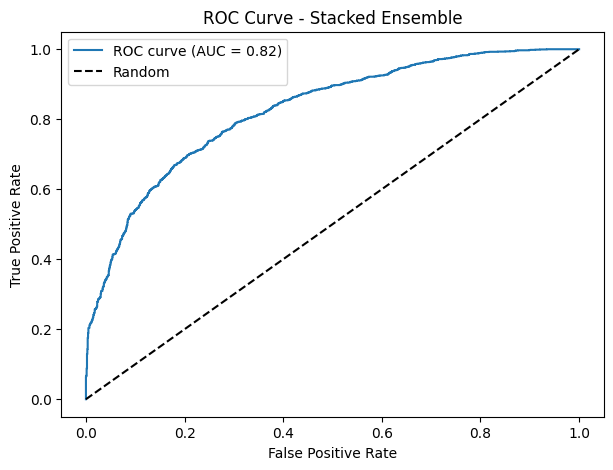

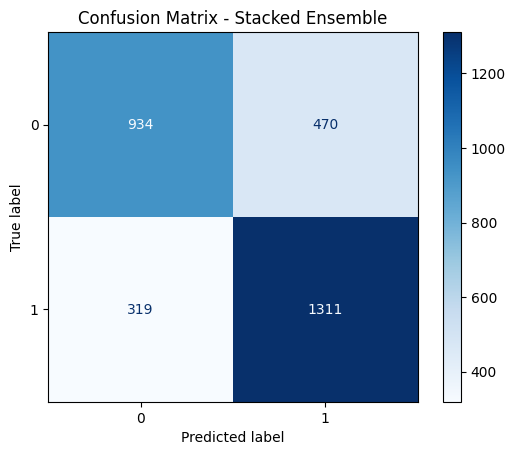

In [42]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay

# Predict on the training data using the full stacked model
meta_preds_full = meta_model_full.predict_proba(X_meta_full)[:, 1]
y_pred_full = meta_model_full.predict(X_meta_full)

# Visualize ROC Curve and Confusion Matrix
import matplotlib.pyplot as plt

# ROC Curve
fpr, tpr, thresholds = roc_curve(y, meta_preds_full)
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc_score(y, meta_preds_full):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Stacked Ensemble')
plt.legend()
plt.show()

# Confusion Matrix
cm = confusion_matrix(y, y_pred_full)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix - Stacked Ensemble')
plt.show()

In [43]:
from sklearn.metrics import (
    log_loss, accuracy_score, roc_auc_score, 
    precision_score, recall_score, f1_score, classification_report
)

# Assuming y and meta_preds_full, y_pred_full are already defined

# Log Loss
print(f"Log Loss: {log_loss(y, meta_preds_full):.4f}")

# Accuracy
print(f"Accuracy: {accuracy_score(y, y_pred_full):.4f}")

# ROC AUC
print(f"ROC AUC: {roc_auc_score(y, meta_preds_full):.4f}")

# Precision
print(f"Precision: {precision_score(y, y_pred_full):.4f}")

# Recall
print(f"Recall: {recall_score(y, y_pred_full):.4f}")

# F1 Score
print(f"F1 Score: {f1_score(y, y_pred_full):.4f}")

# Classification Report
print("\nClassification Report:")
print(classification_report(y, y_pred_full))

Log Loss: 0.5176
Accuracy: 0.7399
ROC AUC: 0.8246
Precision: 0.7361
Recall: 0.8043
F1 Score: 0.7687

Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.67      0.70      1404
           1       0.74      0.80      0.77      1630

    accuracy                           0.74      3034
   macro avg       0.74      0.73      0.74      3034
weighted avg       0.74      0.74      0.74      3034



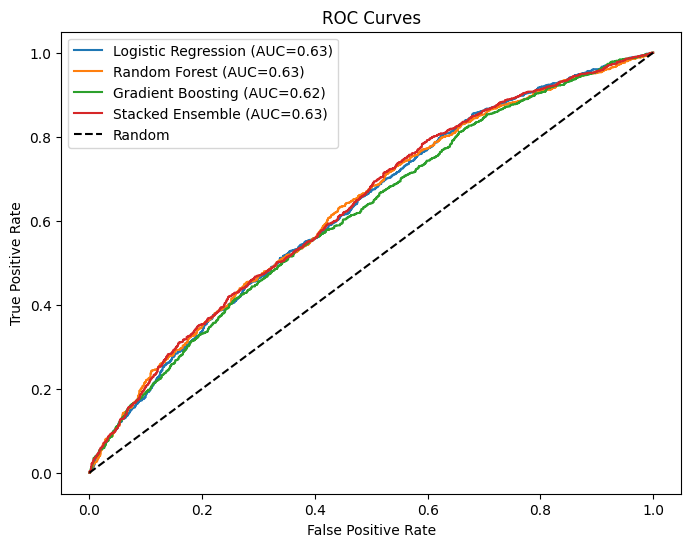

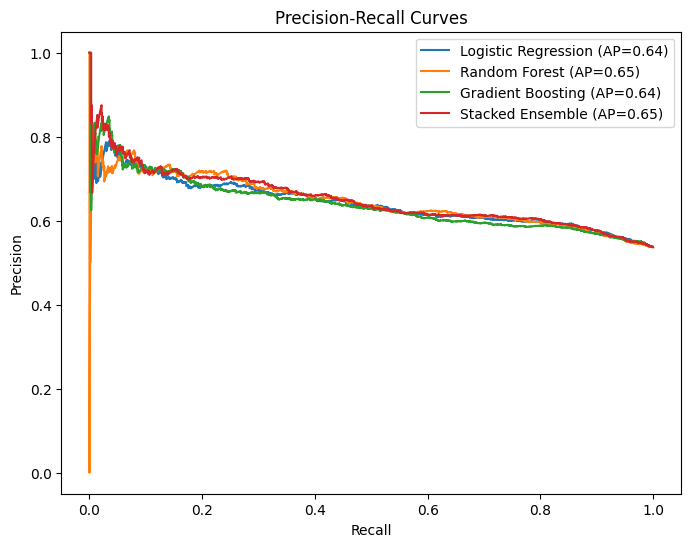

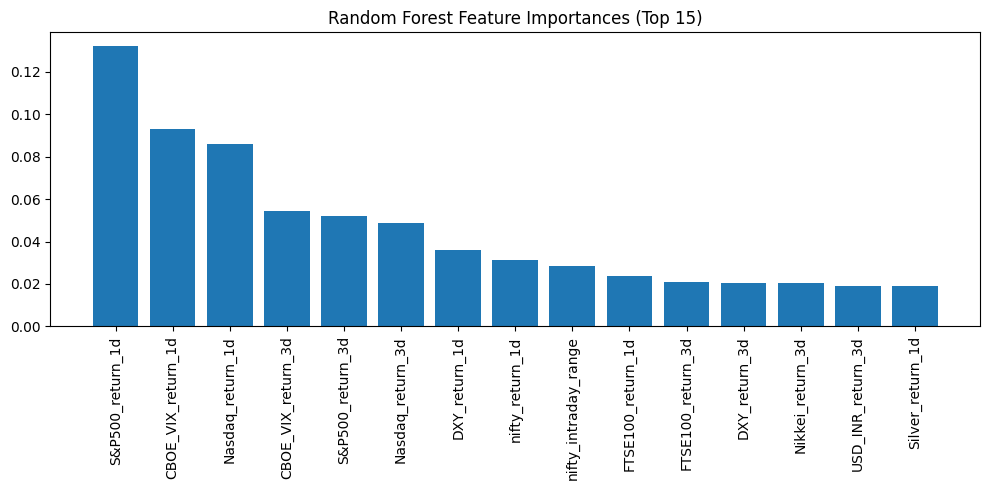

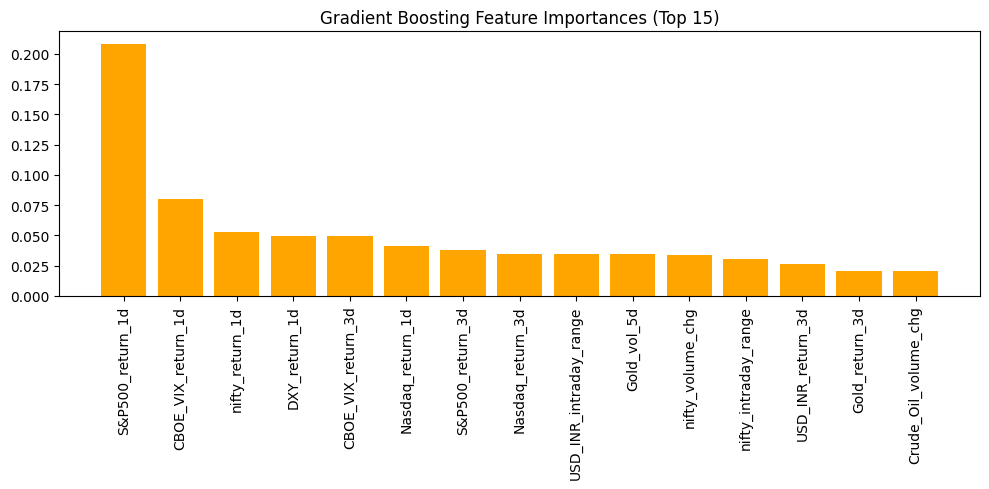

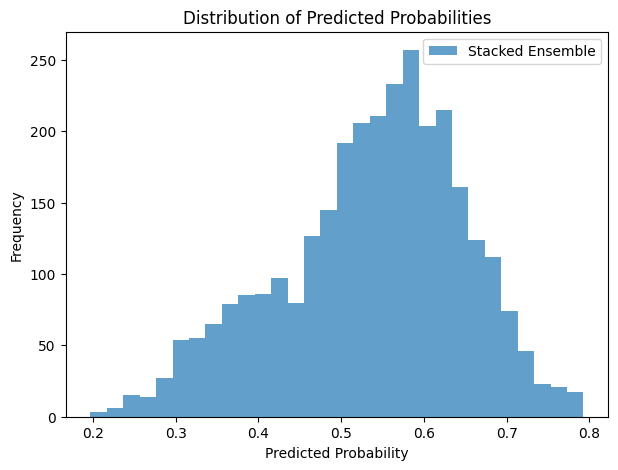

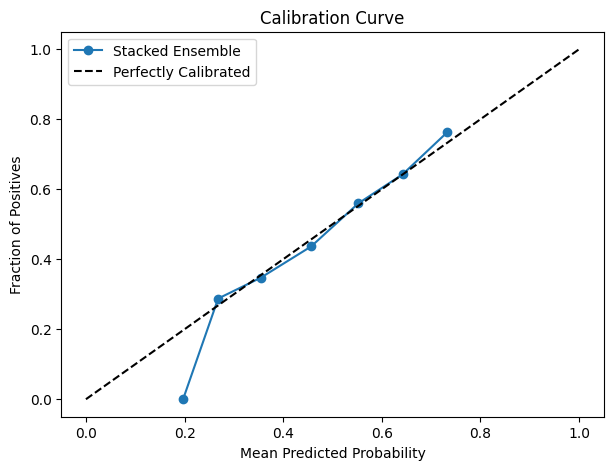

In [46]:
from sklearn.metrics import roc_curve, precision_recall_curve, average_precision_score, RocCurveDisplay, PrecisionRecallDisplay # calibration_curve
from sklearn.calibration import calibration_curve


import matplotlib.pyplot as plt

# 1. ROC Curves for all models
plt.figure(figsize=(8, 6))
models = [
    ('Logistic Regression', oof_preds_lr),
    ('Random Forest', oof_preds_rf),
    ('Gradient Boosting', oof_preds_gb),
    ('Stacked Ensemble', meta_preds)
]
for name, preds in models:
    fpr, tpr, _ = roc_curve(y, preds)
    plt.plot(fpr, tpr, label=f'{name} (AUC={roc_auc_score(y, preds):.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves')
plt.legend()
plt.show()

# 2. Precision-Recall Curves
plt.figure(figsize=(8, 6))
for name, preds in models:
    precision, recall, _ = precision_recall_curve(y, preds)
    ap = average_precision_score(y, preds)
    plt.plot(recall, precision, label=f'{name} (AP={ap:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curves')
plt.legend()
plt.show()

# 3. Feature Importance (Random Forest & Gradient Boosting)
importances_rf = rf_full.feature_importances_
importances_gb = gb_full.feature_importances_
indices = np.argsort(importances_rf)[::-1][:15]  # Top 15 features

plt.figure(figsize=(10, 5))
plt.bar(range(len(indices)), importances_rf[indices], align='center')
plt.xticks(range(len(indices)), [features[i] for i in indices], rotation=90)
plt.title('Random Forest Feature Importances (Top 15)')
plt.tight_layout()
plt.show()

indices_gb = np.argsort(importances_gb)[::-1][:15]
plt.figure(figsize=(10, 5))
plt.bar(range(len(indices_gb)), importances_gb[indices_gb], align='center', color='orange')
plt.xticks(range(len(indices_gb)), [features[i] for i in indices_gb], rotation=90)
plt.title('Gradient Boosting Feature Importances (Top 15)')
plt.tight_layout()
plt.show()

# 4. Distribution of predicted probabilities (Ensemble)
plt.figure(figsize=(7, 5))
plt.hist(meta_preds, bins=30, alpha=0.7, label='Stacked Ensemble')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.title('Distribution of Predicted Probabilities')
plt.legend()
plt.show()

# 5. Calibration Curve for Ensemble
prob_true, prob_pred = calibration_curve(y, meta_preds, n_bins=10)
plt.figure(figsize=(7, 5))
plt.plot(prob_pred, prob_true, marker='o', label='Stacked Ensemble')
plt.plot([0, 1], [0, 1], 'k--', label='Perfectly Calibrated')
plt.xlabel('Mean Predicted Probability')
plt.ylabel('Fraction of Positives')
plt.title('Calibration Curve')
plt.legend()
plt.show()